In [1]:
!pip install unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [1]:
!git clone https://github.com/pooja-premnath/SemEval2025-Task1-ADMIRE.git

Cloning into 'SemEval2025-Task1-ADMIRE'...
remote: Enumerating objects: 515, done.
remote: Total 515 (delta 0), reused 0 (delta 0), pack-reused 515 (from 1)
Receiving objects: 100% (515/515), 291.77 MiB | 15.72 MiB/s, done.
Updating files: 100% (427/427), done.


In [ ]:
!ls

Dev  outputs  Train


In [2]:
%cd SemEval2025-Task1-ADMIRE/

/content/SemEval2025-Task1-ADMIRE


In [ ]:
%cd Train/

/content/SemEval2025-Task1-ADMIRE/Train


In [3]:
from unsloth import tokenizer_utils
def do_nothing(*args, **kwargs):
    pass
tokenizer_utils.fix_untrained_tokens = do_nothing

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [4]:
import torch
major_version, minor_version = torch.cuda.get_device_capability()
print(f"Major: {major_version}, Minor: {minor_version}")
from datasets import load_dataset
import datasets
from trl import SFTTrainer
import pandas as pd
import numpy as np
import os
import pandas as pd
import numpy as np
from unsloth import FastLanguageModel
from trl import SFTTrainer
from transformers import TrainingArguments, Trainer
from typing import Tuple
import warnings
from typing import Any, Dict, List, Union
from transformers import DataCollatorForLanguageModeling
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# os.environ["WANDB_DISABLED"] = "true"

max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+


# model_name = "unsloth/Qwen2-7B-bnb-4bit";load_in_4bit = True
model_name = "unsloth/llama-3-8b-bnb-4bit";load_in_4bit = True,

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = model_name,load_in_4bit = load_in_4bit,
    max_seq_length = max_seq_length,
    dtype = dtype,
)

Major: 7, Minor: 5
==((====))==  Unsloth 2025.1.6: Fast Llama patching. Transformers: 4.47.1.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 7.5. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/198 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

In [5]:
yes_token_id = tokenizer.encode("Yes", add_special_tokens=False)[0]
no_token_id = tokenizer.encode("No", add_special_tokens=False)[0]
# keep only the yes and no tokens from lm_head
par = torch.nn.Parameter(torch.vstack([model.lm_head.weight[no_token_id, :], model.lm_head.weight[yes_token_id, :]]))
print(par.shape)
print(model.lm_head.weight.shape)
model.lm_head.weight = par

torch.Size([2, 4096])
torch.Size([128256, 4096])


In [ ]:
!pip install peft

In [6]:
from peft import LoftQConfig

model = FastLanguageModel.get_peft_model(
    model,
    r = 16,
    target_modules = [
        "lm_head", # can easily be trained because it has only 2 tokens
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = True,  # We support rank stabilized LoRA
    # init_lora_weights = 'loftq',
    # loftq_config = LoftQConfig(loftq_bits = 4, loftq_iter = 1), # And LoftQ
)
print("trainable parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Unsloth: Offloading output_embeddings to disk to save VRAM


/usr/local/lib/python3.11/dist-packages/unsloth/models/_utils.py:752: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  offloaded_W = torch.load(filename, map_location = "cpu", 

Unsloth: Training lm_head in mixed precision to save VRAM
trainable parameters: 41951232


In [ ]:
%cd ..

/content/SemEval2025-Task1-ADMIRE


In [ ]:
%ls


Dev/  Train/


In [37]:
import pandas as pd
train_df1 = pd.read_csv('./Train/subtask_a_train.tsv', sep='\t')
train_df1 = train_df1.rename(columns={'sentence_type': 'label', 'sentence': 'text'})
train_df1['label'] = train_df1['label'].map({'idiomatic': 'Yes', 'literal': 'No'})


In [38]:
train_size = 50
val_size = 20

# keep a subset (for testing)
data_sample = train_df1.sample(n=train_size+val_size, random_state=42)


train_df, val_df = train_test_split(data_sample, test_size=val_size/len(data_sample), random_state=42)
print(len(train_df))

50


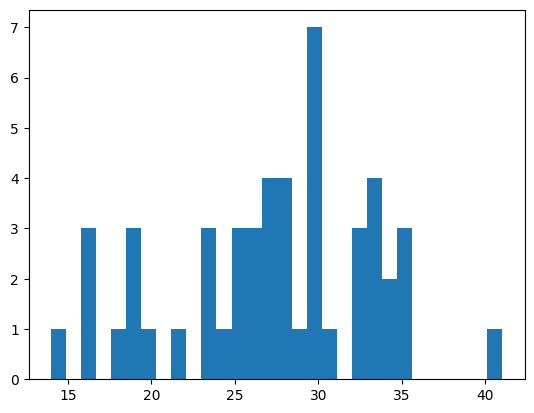

In [39]:
token_counts = [len(tokenizer.encode(x)) for x in train_df.text]
a = plt.hist(token_counts, bins=30)

In [40]:
prompt = """Analyze the following sentence:
{}

In this context, is the phrase '{}' used idiomatically or literally?
Answer "Yes" for idiomatic and "No" for literal.

SOLUTION:
The correct answer is: "{}"
"""


def formatting_prompts_func(dataset_):

    if isinstance(dataset_['text'], str):
        return " "

    texts = []
    for i in range(len(dataset_['text'])):
        t = dataset_['text'][i]  # The sentence
        nc = dataset_['compound'][i]  # The phrase (NC)
        label = dataset_['label'][i]  # "Yes" or "No" for idiomatic/literal
        text = prompt.format(t, nc, label)  # Format the prompt with text, NC, and label
        texts.append(text)
    return texts


In [41]:
val_df['label'] = val_df['label'].map({'Yes': '1', 'No': '0'})

In [42]:
val_df

,compound,subset,label,text,expected_order,image1_name,image1_caption,image2_name,image2_caption,image3_name,image3_caption,image4_name,image4_caption,image5_name,image5_caption
42,black box,Train,0,The unit is encased in an attractive anodized ...,"['41077897719.png', '60904898706.png', '769561...",41077897719.png,The image depicts a black rectangular box with...,60904898706.png,The image depicts an open cardboard box. The b...,73920583487.png,"The image depicts a cute, cartoon-style puppy ...",76956198734.png,The image depicts a cartoon-style illustration...,82295944756.png,The image depicts a cartoon-style scene featur...
22,secret santa,Train,0,St Nicholas becomes a secret santa in this fun...,"['43012219877.png', '53937857464.png', '738842...",43012219877.png,The image depicts a person dressed in a Santa ...,43315095878.png,"The image depicts a group of four people, two ...",53937857464.png,The image depicts a whimsical scene featuring ...,73884284579.png,The image depicts two cartoon characters stand...,83896740010.png,The image depicts a round dining table set for...
48,pins and needles,Train,0,I did a sweep for stray pins and needles and p...,"['18951355308.png', '31343098424.png', '692627...",18951355308.png,The image depicts a large pile of knitting nee...,24771463968.png,The image depicts a person's foot and lower le...,31343098424.png,The image depicts a collection of screws and b...,62351469038.png,"The image depicts a cylindrical container, lik...",69262707128.png,The image depicts a cartoon character with sho...
54,brain surgery,Train,1,The know-how necessary to keep physicians fina...,"['14221797226.png', '00389092717.png', '200593...",00389092717.png,The image depicts a scene on a wooden desk or ...,14221797226.png,The image depicts a cartoon-style illustration...,14803973068.png,The image depicts a bowl containing four scoop...,20059340578.png,The image depicts a medical procedure taking p...,77652241695.png,The image depicts a cartoon illustration of a ...
32,zebra crossing,Train,0,Our driver had to brake hard when we encounter...,"['62775742958.png', '24926483896.png', '580912...",24926483896.png,The image depicts a zebra standing in an enclo...,50338175575.png,The image depicts the interior of a subway tra...,58091284576.png,The image depicts a street scene with several ...,62775742958.png,The image depicts a zebra standing on a paved ...,69410806712.png,"The image depicts a long, straight road flanke..."
57,two-way street,Train,0,"In many cases, two-way streets result in twice...","['02864043166.png', '77388092739.png', '708431...",02864043166.png,The image depicts a city street scene with sev...,64314348310.png,"The image depicts a classic compass, which is ...",70843122394.png,The image depicts a scene where two men are en...,77388092739.png,The image depicts an urban construction site o...,83632254366.png,The image depicts two cartoon characters shaki...
31,old flame,Train,1,She ran into an old flame at the high school r...,"['31217316388.png', '17267051988.png', '061688...",06168811595.png,The image depicts an electric heater. The heat...,17267051988.png,"The image depicts two cartoon characters, a bo...",31217316388.png,The image depicts a man standing and looking a...,35771360108.png,The image depicts a scene with a skeletal figu...,47140387353.png,The image is a heartwarming illustration of a ...
38,rat race,Sample,1,"Get the heck out of the rat race, move to rura...","['27816548474.png', '28647406758.png', '042091...",04209106095.png,The image depicts four mice inside a wire cage...,27816548474.png,The image depicts a cartoon-style illustration...,28647406758.png,The image depicts a cartoon-style illustration...,45504234188.png,The image depicts a cartoon character with lon...,97737199528.png,The image depicts four cartoon-style mice runn...
15,nest egg,Train,1,Some would be better off with no insurance and...,"['02370420010.png', '18562114617.png', '231443...",02370420010.png,The image depicts a 

In [43]:
class DataCollatorForLastTokenLM(DataCollatorForLanguageModeling):
    def __init__(
        self,
        *args,
        mlm: bool = False,
        ignore_index: int = -100,
        **kwargs,
    ):
        super().__init__(*args, mlm=mlm, **kwargs)
        self.ignore_index = ignore_index

    def torch_call(self, examples: List[Union[List[int], Any, Dict[str, Any]]]) -> Dict[str, Any]:
        batch = super().torch_call(examples)

        for i in range(len(examples)):
            # Find the last non-padding token
            last_token_idx = (batch["labels"][i] != self.ignore_index).nonzero()[-1].item()
            # Set all labels to ignore_index except for the last token
            batch["labels"][i, :last_token_idx] = self.ignore_index
            # The old labels for the Yes and No tokens need to be mapped to 1 and 0
            batch["labels"][i, last_token_idx] = 1 if batch["labels"][i, last_token_idx] == yes_token_id else 0


        return batch
collator = DataCollatorForLastTokenLM(tokenizer=tokenizer)

In [44]:
train_dataset = datasets.Dataset.from_pandas(train_df,preserve_index=False)
train_dataset

Dataset({
    features: ['compound', 'subset', 'label', 'text', 'expected_order', 'image1_name', 'image1_caption', 'image2_name', 'image2_caption', 'image3_name', 'image3_caption', 'image4_name', 'image4_caption', 'image5_name', 'image5_caption'],
    num_rows: 50
})

In [45]:
trainer=None
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = train_dataset,
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False, # not needed because group_by_length is True
    args = TrainingArguments(
        per_device_train_batch_size = 16,
        gradient_accumulation_steps = 1,
        warmup_steps = 10,
        learning_rate = 1e-4,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "cosine",
        seed = 3407,
        output_dir = "outputs",
        num_train_epochs = 1,
        # report_to = "wandb",
        report_to = "none",
        group_by_length = True,
    ),
    formatting_func=formatting_prompts_func,
    data_collator=collator,
)

Map (num_proc=2):   0%|          | 0/50 [00:00<?, ? examples/s]

In [31]:

gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.748 GB.
5.797 GB of memory reserved.


In [46]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 50 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 16 | Gradient Accumulation steps = 1
\        /    Total batch size = 16 | Total steps = 4
 "-____-"     Number of trainable parameters = 41,951,232


Step,Training Loss
1,0.172800
2,0.246700
3,0.284600
4,0.356600


In [33]:

used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

10.3522 seconds used for training.
0.17 minutes used for training.
Peak reserved memory = 10.832 GB.
Peak reserved memory for training = 5.035 GB.
Peak reserved memory % of max memory = 73.447 %.
Peak reserved memory for training % of max memory = 34.14 %.


In [47]:
FastLanguageModel.for_inference(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(128256, 4096, padding_idx=128255)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=16, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): lor

In [48]:
from collections import defaultdict
import torch.nn.functional as F

# Step 1: Tokenize the inputs and sort them by their tokenized length
tokenized_inputs = []
for i in range(len(val_df['text'])):
    text = val_df['text'].iloc[i]
    nc = val_df['compound'].iloc[i]  # Extract the NC phrase
    test_str = prompt.format(text, nc, "")  # Format with text, NC, and empty label
    tokenized_input = tokenizer(test_str, return_tensors="pt", add_special_tokens=False)
    tokenized_inputs.append((tokenized_input, test_str, val_df['label'].iloc[i]))

# Step 2: Group the inputs by their tokenized length
grouped_inputs = defaultdict(list)
for tokenized_input, test_str, label in tokenized_inputs:
    length = tokenized_input['input_ids'].shape[1]
    grouped_inputs[length].append((tokenized_input, test_str, label))

# Step 3: Process each group in batches of 64
batch_size = 64
all_outputs = []
all_strings = []
all_labels = []

from tqdm import tqdm
for length, group in tqdm(grouped_inputs.items()):
    for i in range(0, len(group), batch_size):
        batch = group[i:i+batch_size]
        batch_inputs = [item[0] for item in batch]
        batch_strings = [item[1] for item in batch]
        batch_labels = [item[2] for item in batch]

        # Concatenate the batch inputs
        input_ids = torch.cat([item['input_ids'] for item in batch_inputs], dim=0).to("cuda")
        attention_mask = torch.cat([item['attention_mask'] for item in batch_inputs], dim=0).to("cuda")

        # Forward pass
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            # print(outputs.logits[:, -1].shape)

        # Get logits for the first token prediction (assuming binary classification)
        logits = outputs.logits[:, -1, :2]  # Only consider logits for 0 and 1

        # Apply softmax
        probabilities = F.softmax(logits, dim=-1)

        # Get predictions
        predictions = torch.argmax(probabilities, dim=-1)

        all_outputs.extend(predictions.cpu().numpy())
        all_labels.extend(batch_labels)
        all_strings.extend(batch_strings)

# Step 4: Do the label assignment
correct = 0
total = 0

for i in range(len(all_outputs)):
    pred = str(all_outputs[i])
    label = str(all_labels[i])
    if i > len(all_outputs) - 25:
        print(f"{i}: text: {all_strings[i]}\n pred: {pred} label: {label}\n")

    if pred == label:
        correct += 1
    total += 1

print(f"Correct: {correct} Total: {total} Accuracy: {correct/total}")

100%|██████████| 17/17 [00:04<00:00,  3.56it/s]

0: text: Analyze the following sentence:
The unit is encased in an attractive anodized black box that provides EMI/RFI shielding and allows for secure mounting with its threaded inserts on the bottom of its chassis.

In this context, is the phrase 'black box' used idiomatically or literally?
Answer "Yes" for idiomatic and "No" for literal.

SOLUTION:
The correct answer is: ""

 pred: 0 label: 0

1: text: Analyze the following sentence:
St Nicholas becomes a secret santa in this fun adventure, going undercover to keep an eye on the elves in his workshop.

In this context, is the phrase 'secret santa' used idiomatically or literally?
Answer "Yes" for idiomatic and "No" for literal.

SOLUTION:
The correct answer is: ""

 pred: 0 label: 0

2: text: Analyze the following sentence:
I did a sweep for stray pins and needles and packaged up the tissue paper pattern pieces, folding along my muslin adjustments with them.

In this context, is the phrase 'pins and needles' used idiomatically or lit